In [1]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [11]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

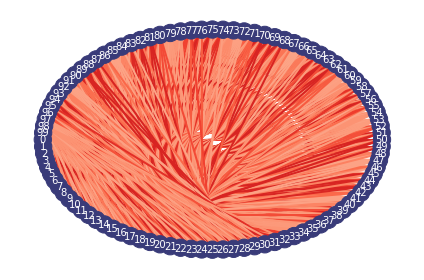

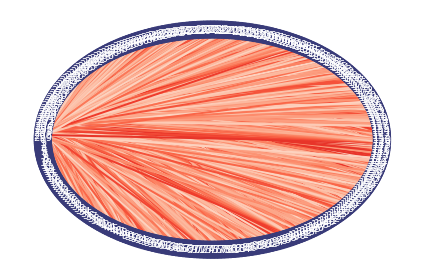

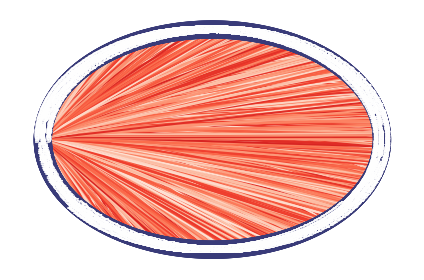

In [12]:
G = nx.empty_graph(N_SMALL)
small(G)
visualize(G)
write_input(G, 'inputs/small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
visualize(G)
write_input(G, 'inputs/medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
visualize(G)
write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [53]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(1, G.number_of_nodes())
    for v in G.nodes:
        G.nodes[v]['team'] = random.randint(1, k)

In [79]:
def max_cut_solve(G: nx.Graph):
    """Simple Max 2-Cut Approach: Sahni and Gonzalez, 1976"""
    k = 2
    team1 = []
    team2 = []
    for v in G.nodes:
        if potential_change(G, team1, team2, v):
            team1.append(v)
            G.nodes[v]['team'] = 1
        else:
            team2.append(v)
            G.nodes[v]['team'] = 2

def potential_change(G, team1, team2, v):
    """Returns True iff cut with v in team1 is greater than or equal to cut with v in team2."""
    v_into_team1 = 0
    v_into_team2 = 0
    for u in team1:
        v_into_team2 += sum(d for i, j, d in G.edges(data='weight') if (i == u and j == v) or (i == v and j == u))
    for u in team2:
        v_into_team1 += sum(d for i, j, d in G.edges(data='weight') if (i == u and j == v) or (i == v and j == u))
    return v_into_team1 >= v_into_team2


In [80]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    pass

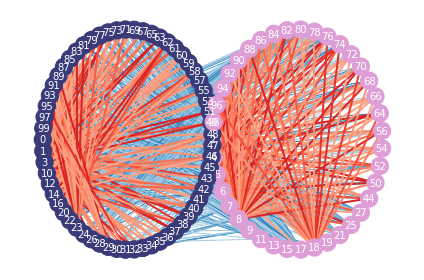

210929.3371690421


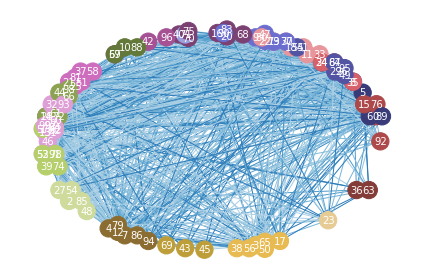

6.39843493530055e+19


In [86]:
G = read_input('inputs/small.in')
max_cut_solve(G)
validate_output(G)
visualize(G)
print(score(G))

G = read_input('inputs/small.in')
random_solve(G)
validate_output(G)
visualize(G)
print(score(G))

In [87]:
run(max_cut_solve, 'inputs/small.in', 'outputs/small.out', True)

inputs/small.in: cost 210929.3371690421


In [88]:
run_all(max_cut_solve, 'inputs', 'outputs', True)
tar('outputs', True)

  0%|          | 0/4 [00:00<?, ?it/s]

inputs/medium.in: cost 958018.9362576171
inputs/example.in: cost 204230.07019425914
inputs/large.in: cost 1787750.8281828458
inputs/small.in: cost 210929.3371690421
